# simulation midterm test

## libraries

In [190]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import probplot, kstest, expon, normaltest

## Parameters

In [191]:
FEL = []

current_time = 0
simulation_time = 24 * 60       # 24 hour

# product
NSP = 6
NSP_quantity_history = []
NSP_time_history = []

# raw material
NSR = 5
NSR_quantity_history = []
NSR_time_history = []

# raw material order
order = 0

# order quantity of raw material
q = 0

# number of packed
NP = 0

# number of working machine
NBM = 0

### Queues
# Queue of raw materials for production
LQM = 0
LQM_time_history = []
LQM_queue_history = []
# Queue of products produced for inspection
LQI = 0
LQI_time_history = []
LQI_queue_history = []
# Queue of Products Inspected for packing
LQP = 0
LQP_time_history = []
LQP_queue_history = []

# Servers Status
op1 = 0
op2 = 0
op3 = 0

# count of customer order
customers = 0
# count of demands which has been met immediately
met_demands_immediately = 0

demand = [2,4,6]
D_prob=[0.3, 0.4, 0.3]
demands_list = []

start_order_time = []
finish_order_time = []
order_time_list = []

## start simulating condition


In [192]:
FEL.append((0,'a'))
FEL.append((30,'r'))

LQM_queue_history.append(0)
LQM_time_history.append(0)

LQM_queue_history.append(0)
LQM_time_history.append(0)

LQM_queue_history.append(0)
LQM_time_history.append(0)

NSP_quantity_history.append(NSP)
NSP_time_history.append(0)

NSR_quantity_history.append(NSR)
NSR_time_history.append(0)

## Customer arrival event 

### poisson distribution
 It has been said that the arrival of customers is from a Poisson distribution with an average of 3 people per hour
 so it can be considered that the time between two arrivals of each customer follows an exponential distribution 
 with a mean of 1/3 per hours or 20 minutes.

In [193]:
def arrival():
    global FEL, current_time, simulation_time, customers,met_demands_immediately, NSP, NSR, order, q, NP, NBM, LQM,LQM_queue_history,LQM_time_history,LQI,LQI_queue_history,LQI_time_history,LQP,LQP_queue_history,LQP_time_history,op1,op2,op3 
    D = np.random.choice(demand, 1, p = D_prob)[0]
    demands_list.append(D)
    customers += 1
    if NSP >= D:
        met_demands_immediately += 1
    NSP -= D
    NSP_quantity_history.append(NSP)
    NSP_time_history.append(current_time)
    between_arrival_time = np.random.exponential(20)
    FEL.append((current_time + between_arrival_time,'a'))
    FEL.sort()


    if (NSP + 10 * order) <= 5:
        order += 1
        start_order_time.append(current_time)
        if (NSR < 10 and NSR >= 0):
            LQM += NSR
            LQM_queue_history.append(LQM)
            LQM_time_history.append(current_time)
            NSR -= 10
            NSR_quantity_history.append(NSR)
            NSR_time_history.append(current_time)
        elif NSR >= 10:
            LQM += 10
            LQM_queue_history.append(LQM)
            LQM_time_history.append(current_time)
            NSR -= 10
            NSR_quantity_history.append(NSR)
            NSR_time_history.append(current_time)
        else:
            NSR -= 10
            NSR_quantity_history.append(NSR)
            NSR_time_history.append(current_time)

        if NBM < 3:
            become_busy = min(3-NBM, LQM)
            NBM += become_busy
            LQM -= become_busy
            LQM_queue_history.append(LQM)
            LQM_time_history.append(current_time)
            for i in range(become_busy):
                manufacturing_time = np.random.uniform(12,18)
                FEL.append((current_time + manufacturing_time, 'm'))
                FEL.sort()

## Event of completion of manufacturing

In [194]:
def manufacturing():
    global FEL, current_time, simulation_time, NSP, NSR, order, q, NP, NBM, LQM,LQM_queue_history,LQM_time_history,LQI,LQI_queue_history,LQI_time_history,LQP,LQP_queue_history,LQP_time_history,op1,op2,op3

    if op1 == 0:
        op1 = 1
        inspection_time = np.random.triangular(8,9,10)
        FEL.append((current_time + inspection_time, 'i1'))
        FEL.sort()

    elif op2 == 0:
        op2 = 1
        inspection_time = np.random.triangular(8,10,12)
        FEL.append((current_time + inspection_time, 'i2'))
        FEL.sort()

    else:
        LQI += 1
        LQI_queue_history.append(LQI)
        LQI_time_history.append(current_time)

    if LQM > 0:
        LQM -= 1
        LQM_queue_history.append(LQM)
        LQM_time_history.append(current_time)
        manufacturing_time = np.random.uniform(12,18)
        FEL.append((current_time + manufacturing_time, 'm'))
        FEL.sort()
    else:
        NBM -= 1

## Completion of the inspection event by OP1 and OP2 

In [195]:
def inspection_op1():
    global FEL, current_time, simulation_time, NSP, NSR, order, q, NP, NBM, LQM,LQM_queue_history,LQM_time_history,LQI,LQI_queue_history,LQI_time_history,LQP,LQP_queue_history,LQP_time_history,op1,op2,op3
    r = np.random.rand()
    if r <= 0.02:
        if NSR > 0:
            NSR -= 1
            NSR_quantity_history.append(NSR)
            NSR_time_history.append(current_time)
            if NBM < 3:
                NBM += 1
                manufacturing_time = np.random.uniform(12,18)
                FEL.append((current_time + manufacturing_time, 'm'))
                FEL.sort()
            else:
                LQM += 1
                LQM_queue_history.append(LQM)
                LQM_time_history.append(current_time)

        else:
            NSR -= 1
            NSR_quantity_history.append(NSR)
            NSR_time_history.append(current_time)

    else:
        if op3 == 0:
            op3 = 1
            packing_time = np.random.exponential(5)
            FEL.append((current_time + packing_time, 'p'))
            FEL.sort()
        else:
            LQP += 1
            LQP_queue_history.append(LQP)
            LQP_time_history.append(current_time)

    if LQI > 0:
        LQI -= 1
        LQI_queue_history.append(LQI)
        LQI_time_history.append(current_time)
        inspection_time = np.random.triangular(8,9,10)
        FEL.append((current_time + inspection_time, 'i1'))
        FEL.sort()

    else: 
        op1 = 0



def inspection_op2():
    global FEL, current_time, simulation_time, NSP, NSR, order, q, NP, NBM, LQM,LQM_queue_history,LQM_time_history,LQI,LQI_queue_history,LQI_time_history,LQP,LQP_queue_history,LQP_time_history,op1,op2,op3

    r = np.random.rand()
    if r <= 0.02:
        if NSR > 0:
            NSR -= 1
            NSR_quantity_history.append(NSR)
            NSR_time_history.append(current_time)
            if NBM < 3:
                NBM += 1
                manufacturing_time = np.random.uniform(12,18)
                FEL.append((current_time + manufacturing_time, 'm'))
                FEL.sort()
            else:
                LQM += 1
                LQM_queue_history.append(LQM)
                LQM_time_history.append(current_time)

        else:
            NSR -= 1
            NSR_quantity_history.append(NSR)
            NSR_time_history.append(current_time)

    else:
        if op3 == 0:
            op3 = 1
            packing_time = np.random.exponential(5)
            FEL.append((current_time + packing_time, 'p'))
            FEL.sort()
        else:
            LQP += 1
            LQP_queue_history.append(LQP)
            LQP_time_history.append(current_time)

    if LQI > 0:
        LQI -= 1
        LQI_queue_history.append(LQI)
        LQI_time_history.append(current_time)
        inspection_time = np.random.triangular(8,10,12)
        FEL.append((current_time + inspection_time, 'i2'))
        FEL.sort()

    else: 
        op2 = 0


## Completion of the packing event

In [196]:
def packing():
    global FEL, current_time, simulation_time, NSP, NSR, order, q, NP, NBM, LQM,LQM_queue_history,LQM_time_history,LQI,LQI_queue_history,LQI_time_history,LQP,LQP_queue_history,LQP_time_history,op1,op2,op3
    NP += 1
    if NP == 10:
        NSP += 10
        NSP_quantity_history.append(NSP)
        NSP_time_history.append(current_time)
        NP = 0
        order -= 1
        finish_order_time.append(current_time)

    if LQP > 0:
        LQP -= 1
        LQP_queue_history.append(LQP)
        LQP_time_history.append(current_time)
        packing_time = np.random.exponential(5)
        FEL.append((current_time + packing_time, 'p'))
        FEL.sort()
    else:
        op3 = 0

## Arrival of raw material  

In [197]:
def arrival_of_raw_material():
    global FEL, current_time, simulation_time, NSP, NSR, order, q, NP, NBM, LQM,LQM_queue_history,LQM_time_history,LQI,LQI_queue_history,LQI_time_history,LQP,LQP_queue_history,LQP_time_history,op1,op2,op3
    if NSR < 0:
        if NSR + q > 0:
            LQM += abs(NSR)
            LQM_queue_history.append(LQM)
            LQM_time_history.append(current_time)
            NSR += q
            NSR_quantity_history.append(NSR)
            NSR_time_history.append(current_time)
        else:
            LQM += q
            LQM_queue_history.append(LQM)
            LQM_time_history.append(current_time)
            NSR += q
            NSR_quantity_history.append(NSR)
            NSR_time_history.append(current_time)
            
    else:
        NSR += q
        NSR_quantity_history.append(NSR)
        NSR_time_history.append(current_time)

    if NBM < 3:
        become_busy = min(3-NBM, LQM)
        NBM += become_busy
        LQM -= become_busy
        LQM_queue_history.append(LQM)
        LQM_time_history.append(current_time)
        for i in range(become_busy):
            manufacturing_time = np.random.uniform(12,18)
            FEL.append((current_time + manufacturing_time, 'm'))
            FEL.sort()

## raw material reviewing

In [198]:
def raw_material_review():
    global FEL, current_time, simulation_time, NSP, NSR, order, q, NP, NBM, LQM,LQM_queue_history,LQM_time_history,LQI,LQI_queue_history,LQI_time_history,LQP,LQP_queue_history,LQP_time_history,op1,op2,op3
    if (15 - NSR) > 0:
        q = 15 - NSR
        submiting_material_std = np.sqrt(5)
        submiting_material = np.random.normal(10,submiting_material_std)
        FEL.append((current_time + submiting_material, 's'))
        FEL.sort()
    FEL.append((current_time + 30, 'r'))
    FEL.sort() 

## Heart of simulation

In [199]:
while (current_time < simulation_time):
    current_time,event_type = FEL.pop(0)
    if event_type == 'a':    
        arrival()
    elif event_type == 'm':
        manufacturing()
    elif event_type == 'i1':
        inspection_op1()
    elif event_type == 'i2':
        inspection_op2()
    elif event_type == 'p':
        packing()
    elif event_type == 's':
        arrival_of_raw_material()
    else:
        raw_material_review()

## end of simulation

In [200]:
LQM_queue_history.append(LQM)
LQM_time_history.append(simulation_time)

LQI_queue_history.append(LQI)
LQI_time_history.append(simulation_time)

LQP_queue_history.append(LQP)
LQP_time_history.append(simulation_time)

NSP_quantity_history.append(NSP)
NSP_time_history.append(simulation_time)

NSR_quantity_history.append(NSR)
NSR_time_history.append(simulation_time)

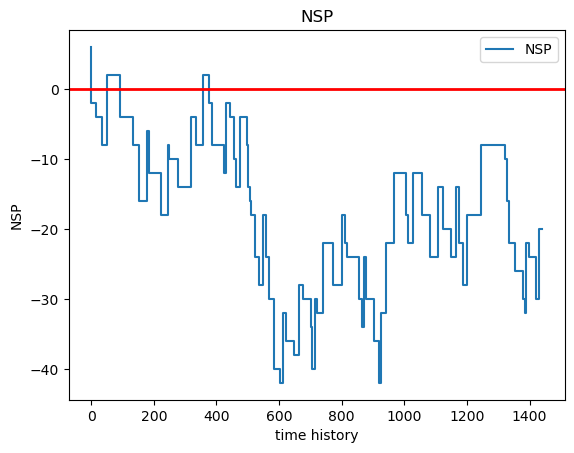

In [201]:
plt.step(NSP_time_history, NSP_quantity_history)
#plt.step(NSR_time_history, NSR_quantity_history)
plt.title('NSP')
plt.xlabel('time history')
plt.ylabel("NSP")
plt.axhline(y=0, color='red', linewidth=2)
plt.legend(['NSP'])
plt.show()

## average of NSP

In [202]:
NSP_lenght = len(NSP_quantity_history)
sum_NSP_quantity = 0
for i in range (NSP_lenght-1):
    sum_NSP_quantity += (NSP_time_history[i+1]-NSP_time_history[i])*NSP_quantity_history[i]
average_NSP_quantity = sum_NSP_quantity / simulation_time
print("average of NSP quantity:", average_NSP_quantity)

average of NSP quantity: -18.230819415128668


## average of NSR 

In [203]:
NSR_lenght = len(NSR_quantity_history)
sum_NSR_quantity = 0
for i in range (NSR_lenght-1):
    sum_NSR_quantity += (NSR_time_history[i+1]-NSR_time_history[i])*NSR_quantity_history[i]
average_NSR_quantity = sum_NSR_quantity / simulation_time
print("average of NSR quantity:", average_NSR_quantity)

average of NSR quantity: 9.73069055990388


## Part 1

In [204]:
percentage_of_met_demands_immediately = (met_demands_immediately / customers) * 100
print("percentage of demands which has been met immediately is:", percentage_of_met_demands_immediately)

percentage of demands which has been met immediately is: 1.5873015873015872


## Part 2

In [205]:
NSP_shortage = []
NSP_inventory = []
for i in range(NSP_lenght):
    if NSP_quantity_history[i] >= 0:
        NSP_inventory.append(NSP_quantity_history[i])
        NSP_shortage.append(0)
    else:
        NSP_shortage.append(NSP_quantity_history[i])
        NSP_inventory.append(0)

sum_NSP_shortage = 0
for i in range (NSP_lenght-1):
    sum_NSP_shortage += (NSP_time_history[i+1]-NSP_time_history[i])*NSP_shortage[i]
average_NSP_shortage = sum_NSP_shortage / simulation_time

max_NSP_shortage = abs(np.min(NSP_shortage))

sum_NSP_inventory = 0
for i in range (NSP_lenght-1):
    sum_NSP_inventory += (NSP_time_history[i+1]-NSP_time_history[i])*NSP_inventory[i]
average_NSP_inventory = sum_NSP_inventory / simulation_time

max_NSP_inventory = np.max(NSP_inventory)


print("max value of product shortage is:",max_NSP_shortage)
print("average of product shortage is:",average_NSP_shortage)
print("max of product inventory is:",max_NSP_inventory)
print("average of product inventory is:",average_NSP_inventory)

max value of product shortage is: 42
average of product shortage is: -18.324633147459323
max of product inventory is: 6
average of product inventory is: 0.09381373233065855


## Part 3

In [206]:
NSR_shortage = []
NSR_inventory = []
for i in range(NSR_lenght):
    if NSR_quantity_history[i] >= 0:
        NSR_inventory.append(NSR_quantity_history[i])
        NSR_shortage.append(0)
    else:
        NSR_shortage.append(NSR_quantity_history[i])
        NSR_inventory.append(0)

sum_NSR_shortage = 0
for i in range (NSR_lenght-1):
    sum_NSR_shortage += (NSR_time_history[i+1]-NSR_time_history[i])*NSR_shortage[i]
average_NSR_shortage = sum_NSR_shortage / simulation_time

max_NSR_shortage = abs(np.min(NSR_shortage))

sum_NSR_inventory = 0
for i in range (NSR_lenght-1):
    sum_NSR_inventory += (NSR_time_history[i+1]-NSR_time_history[i])*NSR_inventory[i]
average_NSR_inventory = sum_NSR_inventory / simulation_time

max_NSR_inventory = np.max(NSR_inventory)


print("max of value raw material shortage is:",max_NSR_shortage)
print("average of raw material shortage is:",average_NSR_shortage)
print("max of raw material inventory is:",max_NSR_inventory)
print("average of raw material inventory is:",average_NSR_inventory)

max of value raw material shortage is: 5
average of raw material shortage is: -0.4401777954729211
max of raw material inventory is: 15
average of raw material inventory is: 10.170868355376799


## Part 4

In [207]:
length_LQM = len(LQM_time_history)
sum_LQM = 0
for i in range (length_LQM - 1):
    sum_LQM += (LQM_time_history[i+1]-LQM_time_history[i])*LQM_queue_history[i]
average_LQM = sum_LQM / simulation_time


length_LQI = len(LQI_time_history)
sum_LQI = 0
for i in range (length_LQI - 1):
    sum_LQI += (LQI_time_history[i+1]-LQI_time_history[i])*LQI_queue_history[i]
average_LQI = sum_LQI / simulation_time


length_LQP = len(LQP_time_history)
sum_LQP = 0
for i in range (length_LQP-1):
    sum_LQP += (LQP_time_history[i+1]-LQP_time_history[i])*LQP_queue_history[i]
average_LQP = sum_LQP / simulation_time


print("average of LQM:",average_LQM)
print("average of LQI:",average_LQI)
print("average of LQP:",average_LQP)

average of LQM: 12.888661053096211
average of LQI: 0.33643612587975125
average of LQP: 4.1200434296611625


## Part 5

order time:
[91.51026723368653, 133.1360571360924, 95.38679338988499, 156.58693372065184, 151.91164657638302, 86.6109865932242, 73.86871295425306, 94.24111260445449, 122.69817451853521, 165.75378125771368, 171.07169806087745, 189.6253529796835, 225.15519232036002, 229.21043890176293, 225.97762564213986, 166.05300408640505, 143.26570653782278, 153.06631911390514, 204.5833595286913, 161.15573803217683, 164.10013915133277, 171.3946840135984, 221.7249916044982, 239.71496161716277]
average of order time: 159.90848656563736
coefficient_of_variation: 0.30655840107578247


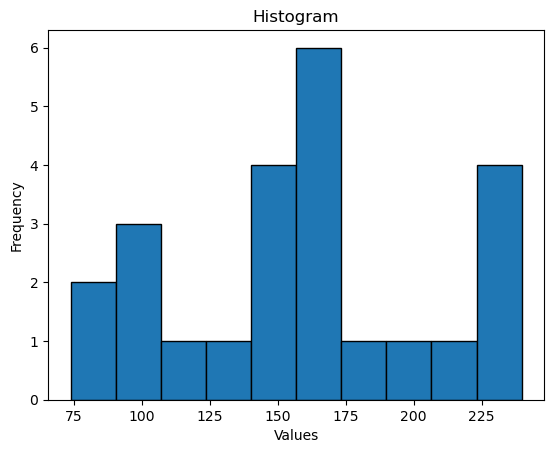

In [208]:
lengh_finish_order_time = len(finish_order_time)
for i in range(lengh_finish_order_time):
    order_time = finish_order_time[i] - start_order_time[i]
    order_time_list.append(order_time)

print("order time:")
print(order_time_list)

std_order = np.std(order_time_list, ddof = 1)
mean_order = np.mean(order_time_list)
print("average of order time:", mean_order)

coefficient_of_variation = std_order / mean_order
print("coefficient_of_variation:",coefficient_of_variation)

plt.hist(order_time_list, edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()


The range of variation of the **coefficient of variation** is between **0.25 and 0.45**.
According to the change coefficient table, it cannot be said that the production time has an **exponential distribution**.

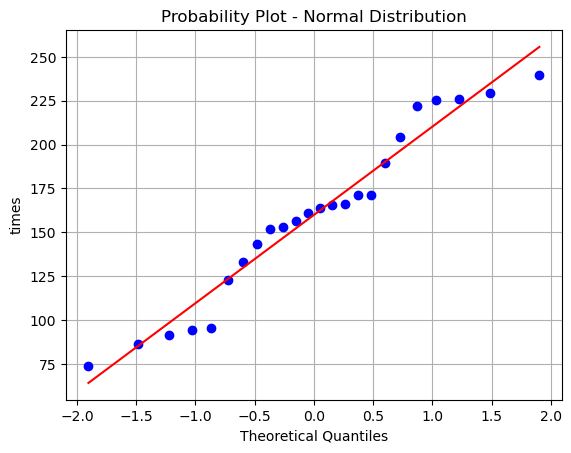

In [209]:
probplot(order_time_list, plot=plt)

plt.xlabel('Theoretical Quantiles')
plt.ylabel('times')
plt.title('Probability Plot - Normal Distribution')
plt.grid(True)
plt.show()

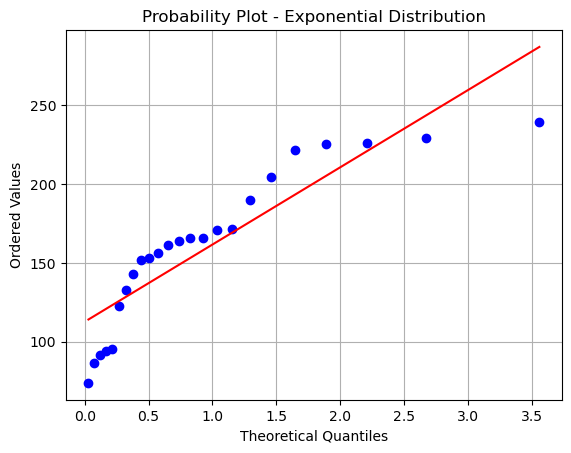

In [210]:
probplot(order_time_list, dist='expon', plot=plt)
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.title('Probability Plot - Exponential Distribution')
plt.grid(True)
plt.show()

In [211]:
# Perform the Chi-Square goodness-of-fit test for normality
chi2_result = normaltest(order_time_list)

print("Chi2 test result:")
print("Test statistic:", chi2_result.statistic)
print("p-value:", chi2_result.pvalue)
if chi2_result.pvalue < 0.05:
    print("It can be concluded that the data does not follow the normal distribution")
else:
     print("It can be concluded that the data follow the normal distribution")

Chi2 test result:
Test statistic: 1.2522337006264477
p-value: 0.5346639553310559
It can be concluded that the data follow the normal distribution


In [212]:
kstest_result = kstest(order_time_list, 'expon')

# Print the test result
print("Kolmogorov-Smirnov test result:")
print("Test statistic:", kstest_result.statistic)
print("p-value:", kstest_result.pvalue)
if kstest_result.pvalue < 0.05:
    print("It can be concluded that the data does not follow the exponential distribution")
else:
     print("It can be concluded that the data follow the exponential distribution")

Kolmogorov-Smirnov test result:
Test statistic: 1.0
p-value: 0.0
It can be concluded that the data does not follow the exponential distribution


## Plot NSP & NSR in the period of time

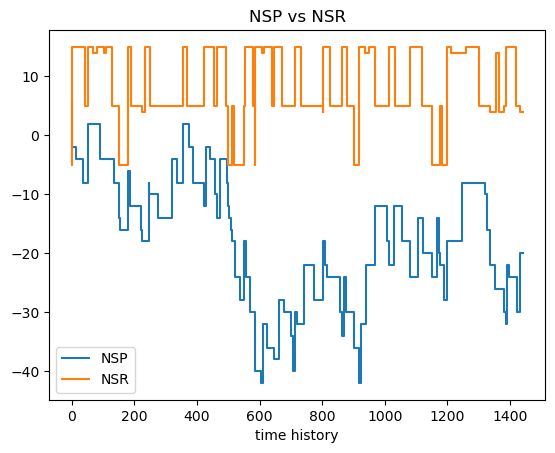

In [213]:
plt.step(NSP_time_history, NSP_quantity_history)
plt.step(NSR_time_history, NSR_quantity_history)
plt.title('NSP vs NSR')
plt.xlabel('time history')
plt.ylabel("")
plt.legend(['NSP', 'NSR'])
plt.show()

#### NSP shortage and inventory(continuously)

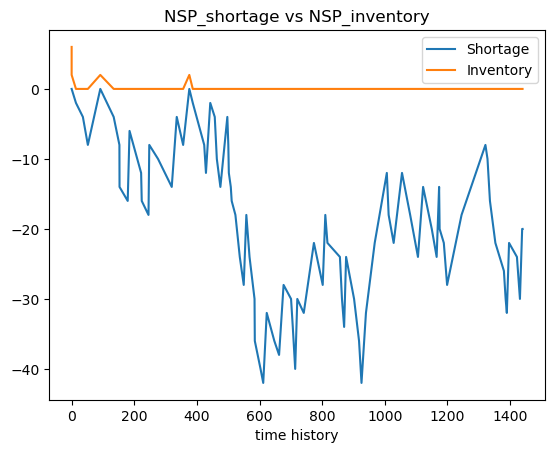

In [214]:
plt.plot(NSP_time_history, NSP_shortage)
plt.plot(NSP_time_history, NSP_inventory)
plt.title('NSP_shortage vs NSP_inventory')
plt.xlabel('time history')
plt.ylabel("")
plt.legend(['Shortage', 'Inventory'])
plt.show()

#### NSP shortage and inventory(discretely)

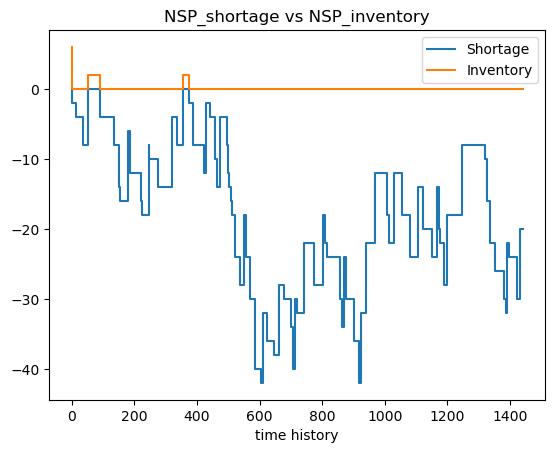

In [215]:
plt.step(NSP_time_history, NSP_shortage)
plt.step(NSP_time_history, NSP_inventory)
plt.title('NSP_shortage vs NSP_inventory')
plt.xlabel('time history')
plt.ylabel("")
plt.legend(['Shortage', 'Inventory'])
plt.show()

#### NSP shortage and inventory(continuously)

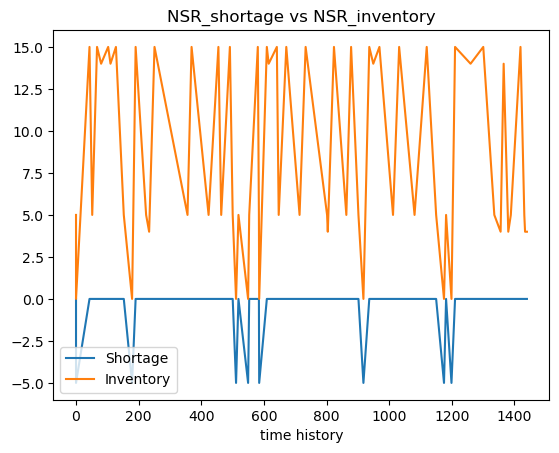

In [216]:
plt.plot(NSR_time_history, NSR_shortage)
plt.plot(NSR_time_history, NSR_inventory)
plt.title('NSR_shortage vs NSR_inventory')
plt.xlabel('time history')
plt.ylabel("")
plt.legend(['Shortage', 'Inventory'])
plt.show()

#### NSP shortage and inventory(discretely)

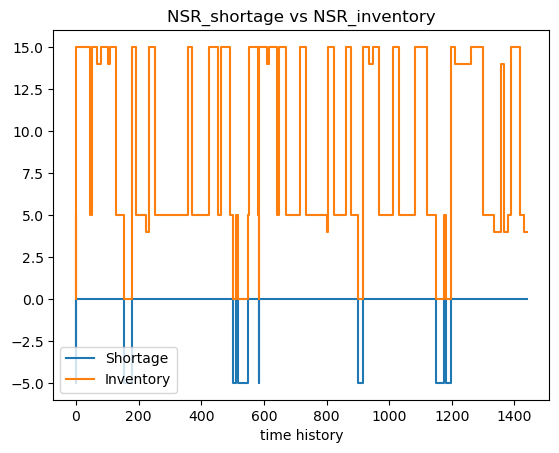

In [217]:
plt.step(NSR_time_history, NSR_shortage)
plt.step(NSR_time_history, NSR_inventory)
plt.title('NSR_shortage vs NSR_inventory')
plt.xlabel('time history')
plt.ylabel("")
plt.legend(['Shortage', 'Inventory'])
plt.show()

## Iteration

In [218]:
iteration = 50
# Part 1
customers_precent_list = []
# Part 2
NSP_shortage_list = []
NSP_shortage_max_list = []
NSP_inventory_list = []
NSP_inventory_max_list = []
# Part 3
NSR_shortage_list = []
NSR_shortage_max_list = []
NSR_inventory_list = []
NSR_inventory_max_list = []
# Part 4
average_LQM_list = []
average_LQI_list = []
average_LQP_list = []

In [219]:
for i in range(iteration):
    FEL = []
    current_time = 0
    simulation_time = 24 * 60       
    NSP = 6
    NSP_quantity_history = []
    NSP_time_history = []
    NSR = 5
    NSR_quantity_history = []
    NSR_time_history = []
    order = 0
    q = 0
    NP = 0
    NBM = 0
    LQM = 0
    LQM_time_history = []
    LQM_queue_history = []
    LQI = 0
    LQI_time_history = []
    LQI_queue_history = []
    LQP = 0
    LQP_time_history = []
    LQP_queue_history = []
    op1 = 0
    op2 = 0
    op3 = 0
    customers = 0
    met_demands_immediately = 0
    demand = [2,4,6]
    D_prob=[0.3, 0.4, 0.3]
    demands_list = []
    NSP = 6
    NSR = 5
    FEL.append((0,'a'))
    FEL.append((30,'review'))
    LQM_queue_history.append(0)
    LQM_time_history.append(0)
    LQM_queue_history.append(0)
    LQM_time_history.append(0)
    LQM_queue_history.append(0)
    LQM_time_history.append(0)
    NSP_quantity_history.append(NSP)
    NSP_time_history.append(0)
    NSR_quantity_history.append(NSR)
    NSR_time_history.append(0)
    NSP_shortage = []
    NSP_inventory = []
    NSR_shortage = []
    NSR_inventory = []

    while (current_time < simulation_time):
        current_time,event_type = FEL.pop(0)
        if event_type == 'a':    
            arrival()
        elif event_type == 'm':
            manufacturing()
        elif event_type == 'i1':
            inspection_op1()
        elif event_type == 'i2':
            inspection_op2()
        elif event_type == 'p':
            packing()
        elif event_type == 's':
            arrival_of_raw_material()
        else:
            raw_material_review()

    LQM_queue_history.append(LQM)
    LQM_time_history.append(simulation_time)
    LQI_queue_history.append(LQI)
    LQI_time_history.append(simulation_time)
    LQP_queue_history.append(LQP)
    LQP_time_history.append(simulation_time)
    NSP_quantity_history.append(NSP)
    NSP_time_history.append(simulation_time)
    NSR_quantity_history.append(NSR)
    NSR_time_history.append(simulation_time)
    # Average of percentage of met demands immediately
    percentage_of_met_demands_immediately = (met_demands_immediately / customers) * 100
    customers_precent_list.append(percentage_of_met_demands_immediately)
    #
    NSP_lenght = len(NSP_quantity_history)
    for i in range(NSP_lenght):
        if NSP_quantity_history[i] >= 0:
            NSP_inventory.append(NSP_quantity_history[i])
            NSP_shortage.append(0)
        else:
            NSP_shortage.append(NSP_quantity_history[i])
            NSP_inventory.append(0)

    sum_NSP_shortage = 0
    for i in range (NSP_lenght-1):
        sum_NSP_shortage += (NSP_time_history[i+1]-NSP_time_history[i])*NSP_shortage[i]
    average_NSP_shortage = sum_NSP_shortage / simulation_time
    NSP_shortage_list.append(average_NSP_shortage)
    
    max_NSP_shortage = abs(np.min(NSP_shortage))
    NSP_shortage_max_list.append(max_NSP_shortage)
    
    sum_NSP_inventory = 0
    for i in range (NSP_lenght-1):
        sum_NSP_inventory += (NSP_time_history[i+1]-NSP_time_history[i])*NSP_inventory[i]
    average_NSP_inventory = sum_NSP_inventory / simulation_time
    NSP_inventory_list.append(average_NSP_inventory)
    
    max_NSP_inventory = np.max(NSP_inventory)
    NSP_inventory_max_list.append(max_NSP_inventory)

    NSR_lenght = len(NSR_quantity_history)
    for i in range(NSR_lenght):
        if NSR_quantity_history[i] >= 0:
            NSR_inventory.append(NSR_quantity_history[i])
            NSR_shortage.append(0)
        else:
            NSR_shortage.append(NSR_quantity_history[i])
            NSR_inventory.append(0)
    
    sum_NSR_shortage = 0
    for i in range (NSR_lenght-1):
        sum_NSR_shortage += (NSR_time_history[i+1]-NSR_time_history[i])*NSR_shortage[i]
    average_NSR_shortage = sum_NSR_shortage / simulation_time
    NSR_shortage_list.append(average_NSR_shortage)
    max_NSR_shortage = abs(np.min(NSR_shortage))
    NSR_shortage_max_list.append(max_NSR_shortage)
    
    sum_NSR_inventory = 0
    for i in range (NSR_lenght-1):
        sum_NSR_inventory += (NSR_time_history[i+1]-NSR_time_history[i])*NSR_inventory[i]
    average_NSR_inventory = sum_NSR_inventory / simulation_time
    NSR_inventory_list.append(average_NSR_inventory)
    max_NSR_inventory = np.max(NSR_inventory)
    NSR_inventory_max_list.append(max_NSR_inventory)
    
    # Average of LQM
    length_LQM = len(LQM_time_history)
    sum_LQM = 0
    for i in range (length_LQM - 1):
        sum_LQM += (LQM_time_history[i+1]-LQM_time_history[i])*LQM_queue_history[i]
    average_LQM = sum_LQM / simulation_time
    average_LQM_list.append(average_LQM)
    # Average of LQI
    length_LQI = len(LQI_time_history)
    sum_LQI = 0
    for i in range (length_LQI - 1):
        sum_LQI += (LQI_time_history[i+1]-LQI_time_history[i])*LQI_queue_history[i]
    average_LQI = sum_LQI / simulation_time
    average_LQI_list.append(average_LQI)
    # Average of LQP
    length_LQP = len(LQP_time_history)
    sum_LQP = 0
    for i in range (length_LQP-1):
        sum_LQP += (LQP_time_history[i+1]-LQP_time_history[i])*LQP_queue_history[i]
    average_LQP = sum_LQP / simulation_time
    average_LQP_list.append(average_LQP)
    

average_customer_precent_list = np.mean(customers_precent_list)
average_NSP_shortage_list = np.mean(NSP_shortage_list)
average_NSP_inventory_list = np.mean(NSP_inventory_list)
average_NSR_shortage_list = np.mean(NSR_shortage_list)
average_NSR_inventory_list = np.mean(NSR_inventory_list)
average_NSP_shortage_max_list = np.mean(NSP_shortage_max_list)
average_NSP_inventory_max_list = np.mean(NSP_inventory_max_list)
average_NSR_shortage_max_list = np.mean(NSR_shortage_max_list)
average_NSR_inventory_max_list = np.mean(NSR_inventory_max_list)
average_average_LQM_list = np.mean(average_LQM_list)
average_average_LQI_list = np.mean(average_LQI_list)
average_average_LQP_list = np.mean(average_LQP_list)


print("iteration :",iteration)
print("average of customers_precent_list:",average_customer_precent_list,"\n")
print("average of NSP_shortage_list:",average_NSP_shortage_list)
print("average of NSP_shortage_max_list:",average_NSP_shortage_max_list,"\n")
print("average of NSP_inventory_list:",average_NSP_inventory_list)
print("average of NSP_inventory_max_list:",average_NSP_inventory_max_list,"\n")
print("average of NSR_shortage_list:",average_NSR_shortage_list) 
print("average of NSR_shortage_max_list:",average_NSR_shortage_max_list,"\n")
print("average of NSR_inventory_list:",average_NSR_inventory_list) 
print("NSR_inventory_max_list:",average_NSR_inventory_max_list,"\n") 
print("average_LQM_list:",average_average_LQM_list)
print("average_LQI_list:",average_average_LQI_list)
print("average_LQP_list:",average_average_LQP_list)

iteration : 150
average of customers_precent_list: 5.0550406299538295 

average of NSP_shortage_list: -29.671970110983203
average of NSP_shortage_max_list: 65.08 

average of NSP_inventory_list: 0.23769461979934126
average of NSP_inventory_max_list: 7.44 

average of NSR_shortage_list: -0.5987406206243843
average of NSR_shortage_max_list: 14.546666666666667 

average of NSR_inventory_list: 9.865117974511723
NSR_inventory_max_list: 15.0 

average_LQM_list: 23.975892364557847
average_LQI_list: 0.4384824670711428
average_LQP_list: 4.797970318243889


In [220]:
# average_LQM_list = []
# average_LQI_list = []
# average_LQP_list = []
# LQM_queue_history = []
# LQM_time_history = []
# LQI_queue_history = []
# LQI_time_history = []
# LQP_queue_history = []
# LQP_time_history = []

# for i in range(2):
#     current_time = 0
#     FEL.clear()
#     FEL.append((0,'a'))
#     FEL.append((0,'r'))

#     LQM_queue_history.clear()
#     LQM_time_history.clear()
#     LQI_queue_history.clear()
#     LQI_time_history.clear()
#     LQP_queue_history.clear()
#     LQP_time_history.clear()
#     NSP = 6
#     NSR = 5
#     LQM_queue_history.append(NSP)
#     LQM_time_history.append(0)

#     while (current_time < simulation_time):
#         current_time,event_type = FEL.pop(0)
#         if event_type == 'a':    
#             arrival()
#         elif event_type == 'm':
#             manufacturing()
#         elif event_type == 'i1':
#             inspection_op1()
#         elif event_type == 'i2':
#             inspection_op2()
#         elif event_type == 'p':
#             packing()
#         elif event_type == 's':
#             arrival_of_raw_material()
#         else:
#             raw_material_review()

#     LQM_queue_history.append(LQM)
#     LQM_time_history.append(simulation_time)

#     print(LQM_queue_history)
#     print(LQM_time_history)



#     length_LQM = len(LQM_time_history)
#     sum_LQM = 0
#     for i in range (length_LQM - 1):
#         sum_LQM += (LQM_time_history[i+1]-LQM_time_history[i])*LQM_queue_history[i]
#     average_LQM = sum_LQM / simulation_time
#     average_LQM_list.append(average_LQM)



# print("average_LQM_list:",average_LQM_list)
# # print("average_LQI_list:",average_LQI_list)
# # print("average_LQP_list:",average_LQP_list)
